# Import librarise

In [48]:
import pandas as pd # Xử lý dữ liệu bảng (lọc nhóm, gộp, missing vaules)
import numpy as np # Tính toán với mảng, thống kê...
import matplotlib.pyplot as plt # Vẽ biểu đồ linh hoạt tùy biến
import seaborn as sns # Vẽ biểu đồ thống kê dựa vào matplotlib
from sklearn.model_selection import train_test_split # tách dữ liệu tập train/test
from sklearn.linear_model import LinearRegression # mô trình hồi quy tuyến tính bậc 1
from sklearn.preprocessing import PolynomialFeatures
import joblib # lưu và đọc các mô hình

# Simple Linear Regression

In [2]:
housing_price_df = pd.read_csv("../../../dataset/Housing.csv") # Sử dụng pandas và dùng read_csv để đọc dữ liệu csv
housing_price_df.head() # hiển thị 5 rows đầu tiên của dataset, head(default = 5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [50]:
housing_price_df.info() #Xem thông tin dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [51]:
housing_price_df_int = housing_price_df[["price", "area","bedrooms", "bathrooms","stories", "parking"]]
housing_price_df_int.head()

,price,area,bedrooms,bathrooms,stories,parking
0,13300000,7420,4,2,3,2
1,12250000,8960,4,4,4,3
2,12250000,9960,3,2,2,2
3,12215000,7500,4,2,2,3
4,11410000,7420,4,1,2,2


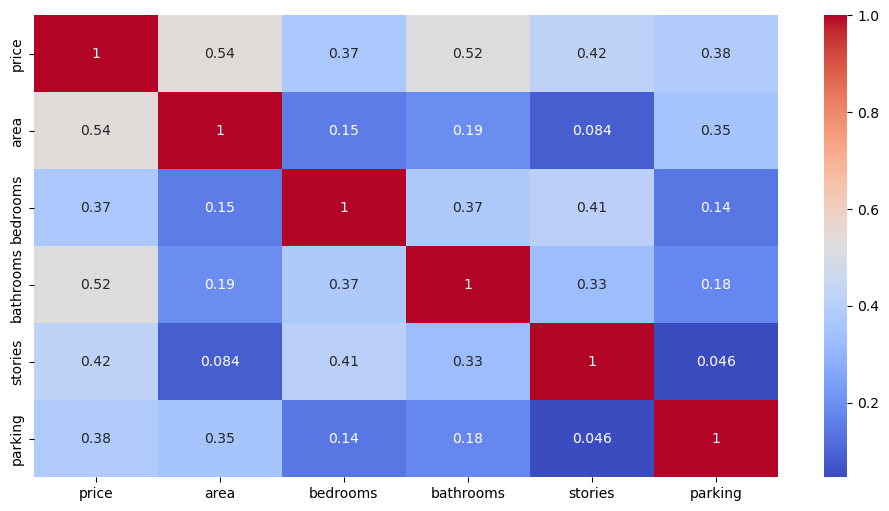

In [52]:
plt.figure(figsize=(12, 6)) #Create canvas
sns.heatmap(housing_price_df_int.corr(), annot= True, cmap="coolwarm") # annot(True) hiddend number / cmap is bang mau
plt.show() 

In [53]:
X = housing_price_df_int[["area","bedrooms", "bathrooms","stories", "parking"]]
y = housing_price_df_int["price"]

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) 

In [55]:
X_train.head()

,area,bedrooms,bathrooms,stories,parking
46,6000,3,2,4,1
93,7200,3,2,1,3
335,3816,2,1,1,2
412,2610,3,1,2,0
471,3750,3,1,2,0


In [56]:
Linear_model = LinearRegression()
Linear_model.fit(X_train, y_train)
#from sklearn.pipeline import make_pipeline

#pipe = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression()) #degree (hyperparameter)
#pipe.fit(X_train, y_train)

#y_pred = pipe.predict(X_test)
#y_pred

LinearRegression()

In [57]:
y_pred = Linear_model.predict(X_test)
y_pred

array([6178627.50326817, 6370140.85865473, 3283148.1570249 ,
       4226007.94816032, 3409685.55116741, 4262158.3499693 ,
       5493440.53152357, 5559897.74293016, 3373715.42245305,
       3020513.18649699, 9519985.01490602, 3250408.25967961,
       3184310.73107686, 3639160.7315938 , 3907874.98339005,
       6174323.64572264, 3148160.32926787, 4872535.73454622,
       4826205.69113307, 3888527.39095668, 5222386.81260559,
       4294589.3803585 , 3162381.17719464, 4193028.43115341,
       5747707.28367817, 7619041.42465273, 2989724.54874164,
       4794005.74968623, 7434038.64867549, 3457027.28535551,
       5102872.70577387, 3982998.90101381, 6215707.38061091,
       4724828.08224186, 4307759.63367012, 5625853.70972471,
       4791990.70630181, 3815116.83871033, 3261429.41224535,
       4879463.83866908, 5326652.37523625, 3156512.70502897,
       6345431.50216772, 4316575.21358846, 4120177.60802241,
       4190668.52130486, 6710808.14327267, 4603723.42489655,
       4521704.65093634,

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [59]:
mae = mean_absolute_error(y_test, y_pred) #y_test gia tri thuc, y_pre cho danh gia
mse = mean_squared_error(y_test, y_pred) # loss model (*) > mae = dao ham () -> Xác định một biến nó tăng/ giảm ở một thời điểm nhất định 
rmse = np.sqrt(mse) # root mean square
r2 = r2_score(y_test, y_pred) #r2 = accuracy model (*) => Linear best

In [60]:
print(f"MAE: {mae}")

MAE: 1127483.3523235186


In [61]:
print(f"MSE: {mse}")

MSE: 2292721545725.362


In [62]:
print(f"RMSE: {rmse}")

RMSE: 1514173.5520492233


In [63]:
print(f"Model Accuracy: {r2}")  

Model Accuracy: 0.5464062355495872


In [64]:
def predict_price(area_m2, bedroom_m2, bathrooms_m2, stories_m, parking_m):
    X_new = pd.DataFrame({"area": [area_m2], "bedrooms": [bedroom_m2], "bathrooms": [bathrooms_m2],  "stories": [stories_m], "parking": [parking_m]}) # fit col[area] 
    return pipe.predict(X_new) # print array, had [0] or item()
print(predict_price(7420, 4,2,3,2))

# 13300000	7420	4	2	3	2 


[7558839.85443883]


=> Accuracy quá thấp cho nên kết quả cho mô hình này không tối ưu